In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [3]:
originaali = pd.read_csv('listings.csv')
LISTINGSFILE = 'listings.csv'
cols = ['price',
        'accommodates',
        'bedrooms',
        'beds',
        'bathrooms',
        'room_type',
        'neighbourhood_group_cleansed',
        'number_of_reviews',
        'latitude',
        'longitude'
        ]
orig_df = pd.read_csv(LISTINGSFILE, usecols=cols)
df = orig_df.copy()

In [5]:
df.shape
df.describe()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,number_of_reviews
count,20576.000000,20576.000000,20576.000000,20512.000000,20557.000000,20546.000000,20576.000000
mean,52.509670,13.407150,2.642448,1.089728,1.169577,1.609267,12.909749
std,0.030523,0.055646,1.504800,0.327364,0.626600,1.174011,26.752975
min,52.345803,13.116319,1.000000,0.000000,0.000000,1.000000,0.000000
25%,52.488719,13.379278,2.000000,1.000000,1.000000,1.000000,1.000000
50%,52.508764,13.417996,2.000000,1.000000,1.000000,1.000000,3.000000
75%,52.532816,13.439145,3.000000,1.000000,1.000000,2.000000,12.000000
max,52.651670,13.743463,16.000000,8.000000,10.000000,16.000000,360.000000


In [6]:
pd.isnull(df).any()

neighbourhood_group_cleansed    False
latitude                        False
longitude                       False
room_type                       False
accommodates                    False
bathrooms                        True
bedrooms                         True
beds                             True
price                           False
number_of_reviews               False
dtype: bool

In [7]:
df = df.dropna(subset=['bathrooms', 'bedrooms', 'beds'])

In [8]:
df['price'] = df['price'].replace('[\$,)]','',  \
        regex=True).replace('[(]','-', regex=True).astype(float)
df = df[df.bedrooms > 0]
df = df[df.beds > 0]
df = df[df.price > 0]
df = df[df.price <= 250]
df = df[df.bathrooms > 0]
df = df[df.number_of_reviews > 0]

In [10]:
df.shape

(15170, 10)

In [12]:
df_filter = df.filter(['price','room_type','neighbourhood_group_cleansed'], axis=1)

In [13]:
roomtype_dummies = pd.get_dummies(df.room_type)
neighbourhood_dummies = pd.get_dummies(df.neighbourhood_group_cleansed)

data = pd.concat((df.drop(['room_type', 'neighbourhood_group_cleansed'], \
    axis=1), roomtype_dummies.astype(int), neighbourhood_dummies.astype(int)),axis=1)
allcols = data.columns

In [14]:
data.corr()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,Entire home/apt,Private room,...,Lichtenberg,Marzahn - Hellersdorf,Mitte,Neukölln,Pankow,Reinickendorf,Spandau,Steglitz - Zehlendorf,Tempelhof - Schöneberg,Treptow - Köpenick
latitude,1.000000,-0.126759,0.033736,-0.010577,0.007195,0.022507,0.058865,0.051454,0.035016,-0.038836,...,0.015380,0.016779,0.374969,-0.472235,0.517535,0.251381,0.035588,-0.281501,-0.239283,-0.250605
longitude,-0.126759,1.000000,-0.007994,-0.012742,0.000668,-0.006254,-0.038491,-0.022310,-0.013104,0.015876,...,0.247451,0.205831,-0.265715,0.227308,0.111967,-0.148299,-0.267137,-0.266335,-0.236456,0.312047
accommodates,0.033736,-0.007994,1.000000,0.217827,0.655808,0.799210,0.575200,0.098354,0.416868,-0.422850,...,-0.019036,0.025191,0.050080,-0.066921,0.036289,-0.015746,-0.005314,-0.001248,-0.007873,0.018625
bathrooms,-0.010577,-0.012742,0.217827,1.000000,0.265403,0.249569,0.195358,0.007124,-0.025100,0.016932,...,-0.015069,0.011175,0.034575,-0.050921,-0.007150,-0.007801,0.006097,-0.003048,0.008999,0.043257
bedrooms,0.007195,0.000668,0.655808,0.265403,1.000000,0.636334,0.542200,0.019415,0.391285,-0.381177,...,-0.025565,0.037866,0.010481,-0.038580,0.047953,-0.009769,-0.003035,0.024437,-0.002165,0.036095
beds,0.022507,-0.006254,0.799210,0.249569,0.636334,1.000000,0.461034,0.076995,0.307237,-0.328912,...,-0.014341,0.049312,0.040808,-0.069826,0.035409,0.000419,0.011332,0.015504,-0.001830,0.034752
price,0.058865,-0.038491,0.575200,0.195358,0.542200,0.461034,1.000000,0.081399,0.543666,-0.526038,...,-0.063834,-0.006932,0.086206,-0.123778,0.076575,-0.046455,-0.020992,-0.014196,-0.015161,-0.026726
number_of_reviews,0.051454,-0.022310,0.098354,0.007124,0.019415,0.076995,0.081399,1.000000,0.050510,-0.048389,...,-0.021959,-0.010400,0.073401,-0.069195,0.032075,-0.009352,-0.014540,-0.021708,-0.009395,-0.024790
Entire home/apt,0.035016,-0.013104,0.416868,-0.025100,0.391285,0.307237,0.543666,0.050510,1.000000,-0.976158,...,-0.026676,0.010591,0.005009,-0.055002,0.081575,-0.024006,-0.021713,-0.001117,0.002763,0.004920
Private room,-0.038836,0.015876,-0.422850,0.016932,-0.381177,-0.328912,-0.526038,-0.048389,-0.976158,1.000000,...,0.021953,-0.015060,-0.016075,0.061583,-0.077137,0.022638,0.021271,0.003237,-0.005618,-0.003643


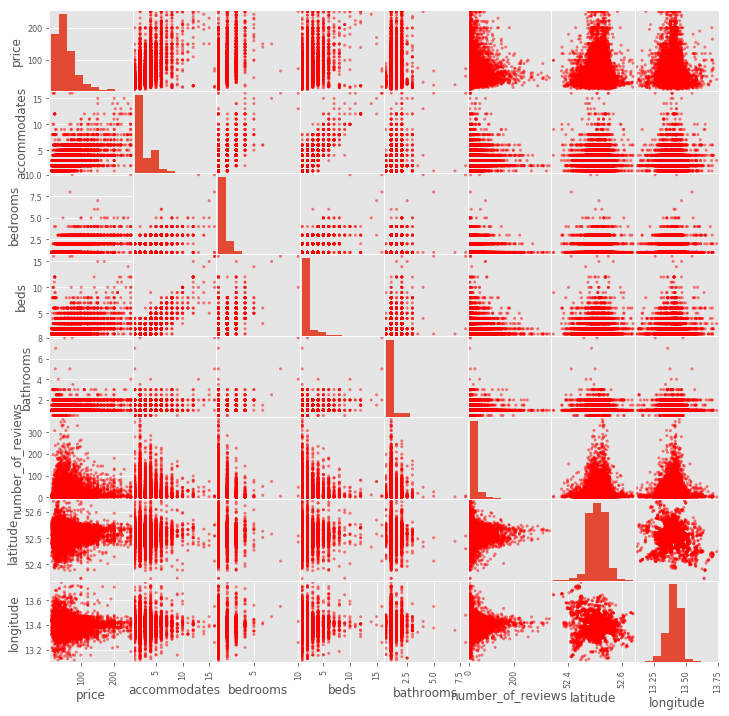

In [17]:
scattercols = ['price',
        'accommodates',
        'bedrooms',
        'beds',
        'bathrooms',
        'number_of_reviews',
        'latitude',
        'longitude'
        ]
axs = pd.plotting.scatter_matrix(data[scattercols],
                        figsize=(12, 12), c='red')

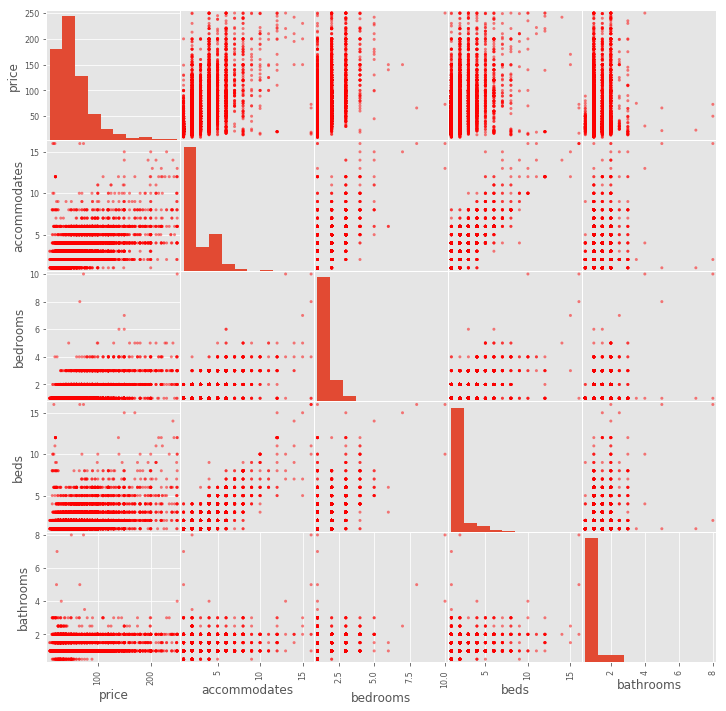

In [20]:
from pandas.plotting import scatter_matrix
scattercols = ['price',
        'accommodates',
        'bedrooms',
        'beds',
        'bathrooms',
        ]
axs = scatter_matrix(data[scattercols],
                        figsize=(12, 12), c='red')